In [ ]:
!pip install windrose

In [ ]:
# Importing the pyhton packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from windrose import WindroseAxes

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
# Load the dataset in a data frame
df = pd.read_csv("/content/dataset.csv")

# Data Assessment
To check for flaws in quality and structure of the dataset.
1. Observing the first 10 rows.
2. Checking duplicate rows.
3. Information of dataset columns.
4. Columns containing null values.
5. Observing random samples of data.
6. Observing Combined Wind Direction column.
7. Looking at the descriptive statistics.

In [ ]:
#1. observing the first 10 rows in the dataset.
df.head(10)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [ ]:
#2. checking if there are duplicate rows in the dataset.
dup_row_count = sum(df.duplicated())
print(f"Number of Duplicate Rows = {dup_row_count}")

Number of Duplicate Rows = 0


In [ ]:
#3. checking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [ ]:
#4. columns containing null values.
null_cols = df.columns[df.isnull().any()]
null_cols

Index(['pm2.5'], dtype='object')

In [ ]:
#5. observing random samples of data
df.sample(5)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
9440,9441,2011,1,29,8,8.0,-24,-11.0,1037.0,NW,128.31,0,0
32286,32287,2013,9,7,6,113.0,16,18.0,1017.0,NW,0.89,0,0
25917,25918,2012,12,15,21,343.0,-1,0.0,1026.0,cv,1.78,0,0
23485,23486,2012,9,5,13,50.0,11,27.0,1017.0,cv,0.89,0,0
13723,13724,2011,7,26,19,55.0,24,30.0,998.0,SE,19.22,0,0


In [ ]:
#6. observing the cbwd column (checking for unique vals)
df['cbwd'].unique()

array(['NW', 'cv', 'NE', 'SE'], dtype=object)

In [ ]:
#7. descriptive statistics of the dataset
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


# Data Cleaning
After data assessment was done, we found some issues with the dataset. The cleaning steps are:
1. Create a copy of the dataset.
2. Create a new 'date' column combining the 'year', 'month', and 'day' columns and also changing the datatype of the new column to Datetime.
3. Handling NULL values in PM2.5 column.
4. Replacing 'cv' with 'SW' in 'cbwd' column as South-West is the only missing value.
5. Converting the units of pressure to atm (SI unit).
6. Grouping months into season. Autumns = (Sep - Nov), Sprint = (Mar, May), Summer = (Jun, Aug), Winter = (Dec, Feb)
7. Extracting month name from month number.
8. Dropping the first column as it is of no value to us.

In [ ]:
#1. copying the df to df_copy
df_copy = df.copy()

In [ ]:
#2. creating the 'date' column
date_columns = ['year', 'month', 'day']
date = df[date_columns].apply(lambda x: '-'.join(x.values.astype(str)), axis = "columns")

df.insert(5, 'date', date) #insert 'date' as the 5th column

df['date'] = pd.to_datetime(df['date']) #changing the datatype to datetime

df.head()

,No,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,2010-01-01,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,2010-01-01,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,2010-01-01,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,2010-01-01,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,2010-01-01,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [ ]:
#3. handling null values in pm2.5 column.
#i. checking the number of null values
nan_count = df['pm2.5'].isna().sum()
print(f"Total Null Values Before = {nan_count}")

#ii. rows of null values
null_rows = df['pm2.5'].isna()
print(df[null_rows])

Total Null Values Before = 2067
          No  year  month  day  hour       date  pm2.5  DEWP  TEMP    PRES  \
0          1  2010      1    1     0 2010-01-01    NaN   -21 -11.0  1021.0   
1          2  2010      1    1     1 2010-01-01    NaN   -21 -12.0  1020.0   
2          3  2010      1    1     2 2010-01-01    NaN   -21 -11.0  1019.0   
3          4  2010      1    1     3 2010-01-01    NaN   -21 -14.0  1019.0   
4          5  2010      1    1     4 2010-01-01    NaN   -20 -12.0  1018.0   
...      ...   ...    ...  ...   ...        ...    ...   ...   ...     ...   
43548  43549  2014     12   20    12 2014-12-20    NaN   -18   0.0  1030.0   
43549  43550  2014     12   20    13 2014-12-20    NaN   -19   1.0  1029.0   
43550  43551  2014     12   20    14 2014-12-20    NaN   -20   1.0  1029.0   
43551  43552  2014     12   20    15 2014-12-20    NaN   -20   2.0  1028.0   
43552  43553  2014     12   20    16 2014-12-20    NaN   -21   1.0  1028.0   

      cbwd     Iws  Is  Ir  
0 

In [ ]:
#iii. replacing the null values using forward fill and backward fill method
df['pm2.5'] = df['pm2.5'].ffill().bfill()

#iv. Finally checking the number of null values
nan_count = df['pm2.5'].isna().sum()
print(f"Totol Null Values After = {nan_count}")

Totol Null Values After = 0


In [ ]:
#4. replacing the 'cv' values with 'SW' in column 'cbwd'
df['cbwd'].replace(to_replace = "cv", value = "SW", inplace = True)
df['cbwd'].unique()

array(['NW', 'SW', 'NE', 'SE'], dtype=object)

In [ ]:
#5. converting the units of pressure
# 1hPa = 0.000987 atm
pressure = df['PRES']*0.000987
df.insert(10, 'atm_pressure', pressure)
print(df.columns)

Index(['No', 'year', 'month', 'day', 'hour', 'date', 'pm2.5', 'DEWP', 'TEMP',
       'PRES', 'atm_pressure', 'cbwd', 'Iws', 'Is', 'Ir'],
      dtype='object')


In [ ]:
#6. grouping the months into seasons
def season_finder(month) -> str:
  """converts month to respective season"""
  rem_val = month % 12
  if rem_val < 3:
    return "Winter"
  elif rem_val < 6:
    return "Spring"
  elif rem_val < 9:
    return "Summer"
  else: return "Autumn"

season_list = []
for month in df['month']:
  season = season_finder(month)
  season_list.append(season)

df['season'] = season_list
df.sample(10)

,No,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,atm_pressure,cbwd,Iws,Is,Ir,season
1188,1189,2010,2,19,12,2010-02-19,96.0,-16,7.0,1017.0,1.003779,SW,1.78,0,0,Winter
29693,29694,2013,5,22,5,2013-05-22,69.0,10,16.0,1009.0,0.995883,SW,4.90,0,0,Spring
27641,27642,2013,2,25,17,2013-02-25,158.0,-2,-1.0,1025.0,1.011675,NW,8.05,0,0,Winter
10164,10165,2011,2,28,12,2011-02-28,13.0,-11,4.0,1028.0,1.014636,NW,33.98,0,0,Winter
9464,9465,2011,1,30,8,2011-01-30,17.0,-21,-6.0,1036.0,1.022532,NW,125.17,0,0,Winter
18660,18661,2012,2,17,12,2012-02-17,19.0,-23,-1.0,1033.0,1.019571,NW,235.15,0,0,Winter
6165,6166,2010,9,14,21,2010-09-14,225.0,18,23.0,1013.0,0.999831,SE,18.78,0,0,Autumn
1866,1867,2010,3,19,18,2010-03-19,240.0,2,7.0,1001.0,0.987987,SW,2.67,0,0,Spring
29589,29590,2013,5,17,21,2013-05-17,96.0,14,21.0,1010.0,0.996870,SE,26.82,0,0,Spring
25127,25128,2012,11,12,23,2012-11-12,6.0,-11,5.0,1017.0,1.003779,NW,83.57,0,0,Autumn


In [ ]:
#7. extracting the month names
df['month_name'] = df['month'].apply(lambda x: calendar.month_abbr[x])

df['month_name'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [ ]:
#8. dropping the first column
df = df.drop('No', axis=1)
df.columns

Index(['year', 'month', 'day', 'hour', 'date', 'pm2.5', 'DEWP', 'TEMP', 'PRES',
       'atm_pressure', 'cbwd', 'Iws', 'Is', 'Ir', 'season', 'month_name'],
      dtype='object')

Saving the cleaned dataframe to a different file.

In [ ]:
df.to_csv("/content/cleanded_df.csv")
df.sample(10)

,year,month,day,hour,date,pm2.5,DEWP,TEMP,PRES,atm_pressure,cbwd,Iws,Is,Ir,season,month_name
18942,2012,2,29,6,2012-02-29,190.0,-8,-6.0,1021.0,1.007727,NW,0.89,0,0,Winter,Feb
25293,2012,11,19,21,2012-11-19,67.0,-4,0.0,1024.0,1.010688,SW,0.89,0,0,Autumn,Nov
6795,2010,10,11,3,2010-10-11,5.0,11,13.0,1013.0,0.999831,NW,32.63,0,0,Autumn,Oct
10498,2011,3,14,10,2011-03-14,18.0,-19,6.0,1031.0,1.017597,NW,54.09,0,0,Spring,Mar
14547,2011,8,30,3,2011-08-30,203.0,22,23.0,1009.0,0.995883,NE,5.36,0,0,Summer,Aug
5708,2010,8,26,20,2010-08-26,101.0,16,25.0,1013.0,0.999831,NW,3.13,0,0,Summer,Aug
43636,2014,12,24,4,2014-12-24,9.0,-15,-3.0,1029.0,1.015623,NW,15.19,0,0,Winter,Dec
31612,2013,8,10,4,2013-08-10,62.0,20,24.0,1003.0,0.989961,NW,4.47,0,0,Summer,Aug
27646,2013,2,25,22,2013-02-25,148.0,-4,-1.0,1025.0,1.011675,NW,18.78,0,0,Winter,Feb
9018,2011,1,11,18,2011-01-11,19.0,-22,-3.0,1024.0,1.010688,NW,99.70,0,0,Winter,Jan


# Exploratory Data Analysis
## Question-Visualization-Observation Framework
This framework includes asking questions from data, creating visualizations and drawing observations based on them.

## Q-1: How does PM2.5 vary over time?
From [Breeze Technologies](https://www.breeze-technologies.de/blog/what-is-an-air-quality-index-how-is-it-calculated/), The levels of PM2.5 have been grouped to determine the air quality status

* Excellent (0 - 7): According to current research, negative impacts on ecosystems are unlikely.
* Fine (7 - 15): All values are under the legal health protection limits. Effects on ecosystems can no longer be ruled out
* Moderate (15 - 30): The health protection limits are mostly still met. Effects on ecosystems are increasingly possible.
* Poor (30 -55): The measured values are at the level of health protection limit values. Health impairments of sensitive persons may occur sporadically.
* Very Poor (55 - 110): The health protection limits have been exceeded. Health impairments of sensitive persons are possible. The population is increasingly informed about the pollutant situation.
* Severe (110 >): The measured values are at alarming levels. The health protection thresholds are clearly exceeded. Health impairments of all persons are possible.

In [ ]:
# As a first step, let's calculate the mean value of pm2.5
avg = df['pm2.5'].mean()
print(avg)

97.80111354508945


Let's assume 100 ug/m3 to be the safe zone (close to mean and still below the severe level of 110ug/m3).

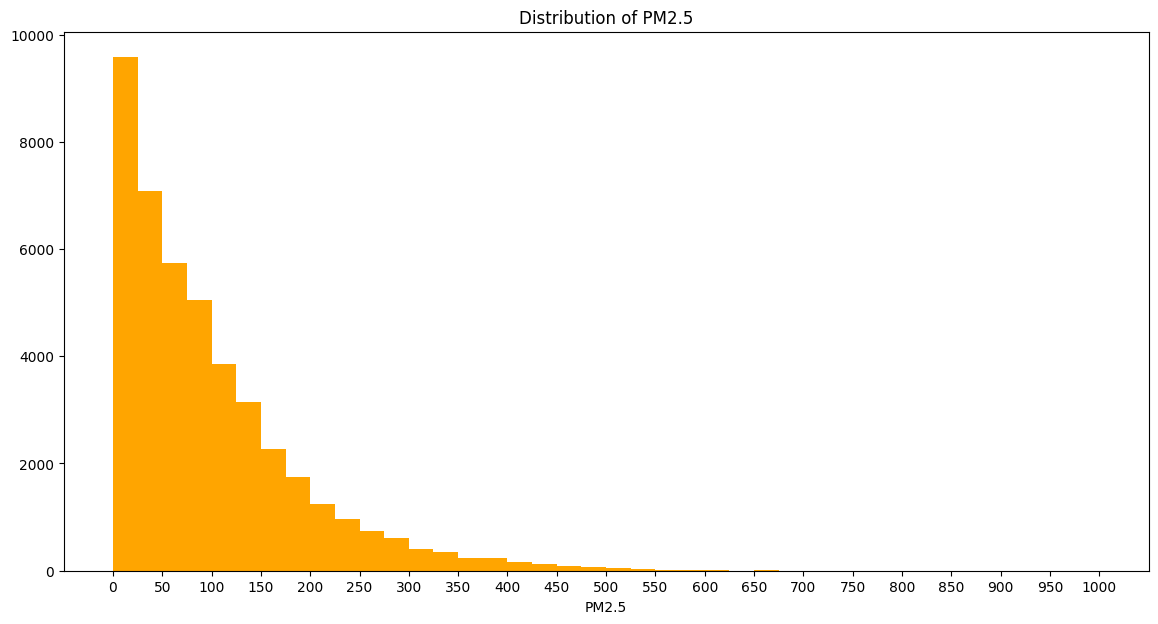

In [ ]:
# Observing the distribution of the column.
x = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000]
plt.figure(figsize = (14, 7))
bins = np.arange(0, df['pm2.5'].max()+25, 25)
plt.hist(data=df, x='pm2.5', bins=bins, color="orange")
plt.xticks(x)
plt.title('Distribution of PM2.5')
plt.xlabel('PM2.5')
plt.show();

From the above histogram, we can observe that the pm2.5 values are left skewed having bulk of them between the range 0 to 150 ug/m3. Also there are values reaching the 1000 ug/m3 which is way over the safe limit (100ug/m3).

<Figure size 1500x700 with 0 Axes>

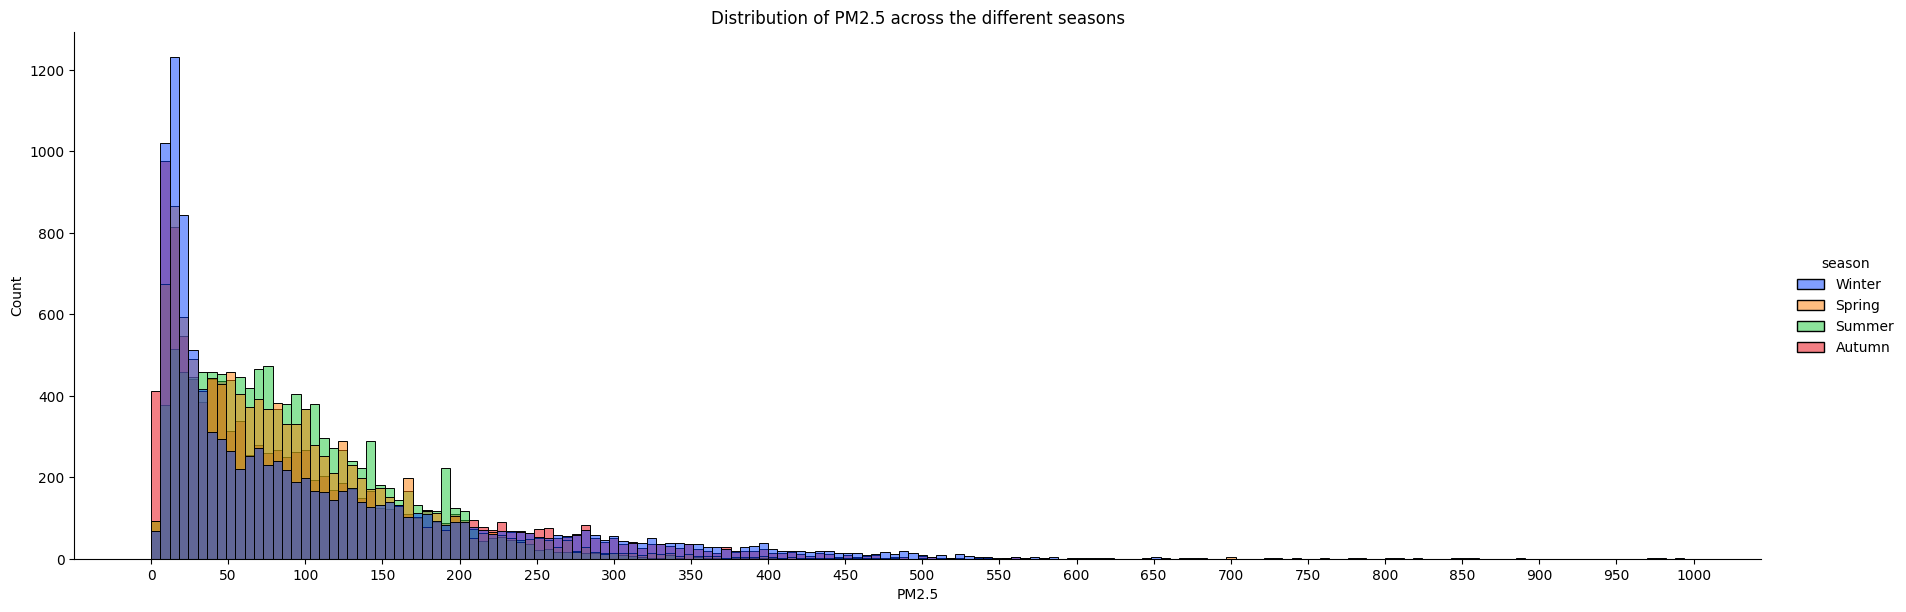

In [ ]:
# Let's observe the per season distribution of pm2.5 values.
plt.figure(figsize = (15, 7))
sns.displot(data = df, x = 'pm2.5', hue = 'season', kind = 'hist', fill = True,
           palette = sns.color_palette('bright')[:4], height =6, aspect = 3)
plt.xticks(x)
plt.title('Distribution of PM2.5 across the different seasons')
plt.xlabel('PM2.5')
plt.show();

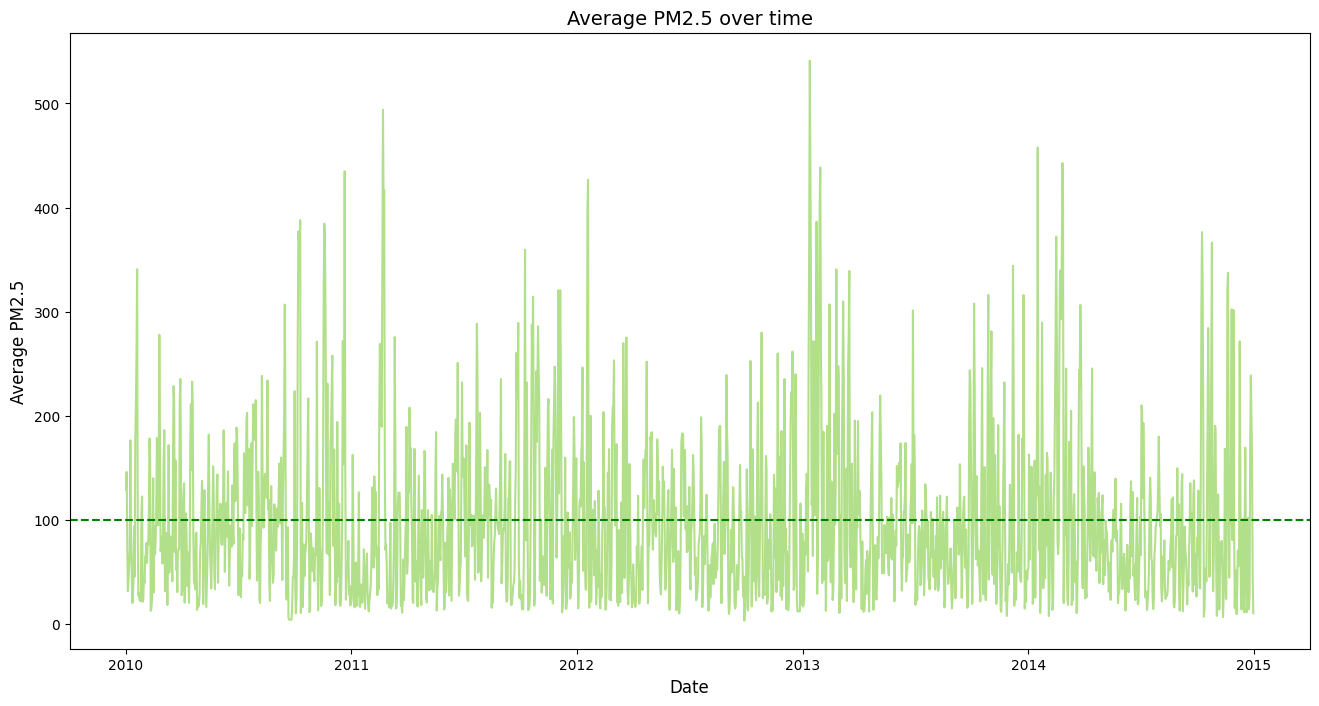

In [ ]:
# Plotting and observing the average pm2.5 values from 2010 to 2014.
date = df.groupby('date')['pm2.5'].mean().sort_index()

base_color = sns.color_palette("Paired")[2]
plt.figure(figsize= [16, 8])
sns.lineplot(x = date.index, y = date, color = base_color)
plt.axhline(100, ls= '--', color= 'green')
plt.xlabel('Date', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 over time', fontsize = 14)
plt.show()

year
2010    101.626370
2011     97.992580
2012     89.933857
2013    101.600228
2014     97.874087
Name: pm2.5, dtype: float64


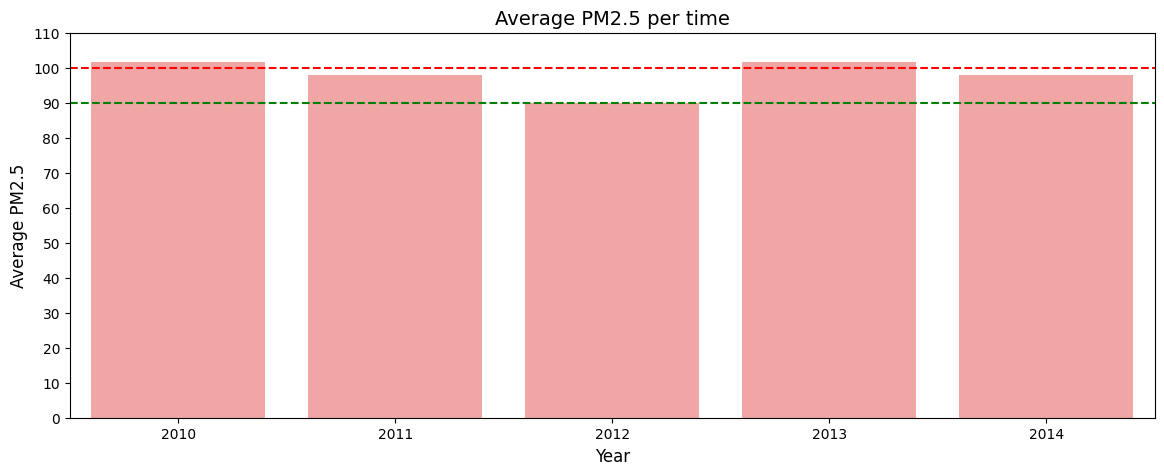

In [ ]:
# checking the average pm2.5 per year
year = df.groupby('year')['pm2.5'].mean().sort_index()
print(year)
y = [0, 10, 20, 30, 40, 50, 60, 70 , 80, 90, 100, 110]
base_color = sns.color_palette("Paired")[4]
plt.figure(figsize= [14, 5])
sns.barplot(x = year.index, y = year, color = base_color)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.yticks(y)
plt.axhline(100, ls= '--', color= 'red')
plt.axhline(90, ls= '--', color= 'green')
plt.show()

**Observation**: On Average, 2010 & 2013 had an average of above 100u/gm3 (Above the safe zone). 2011 & 2014 come very close to an average of 100ug/m3. 2012 is slightly below 90ug/m3

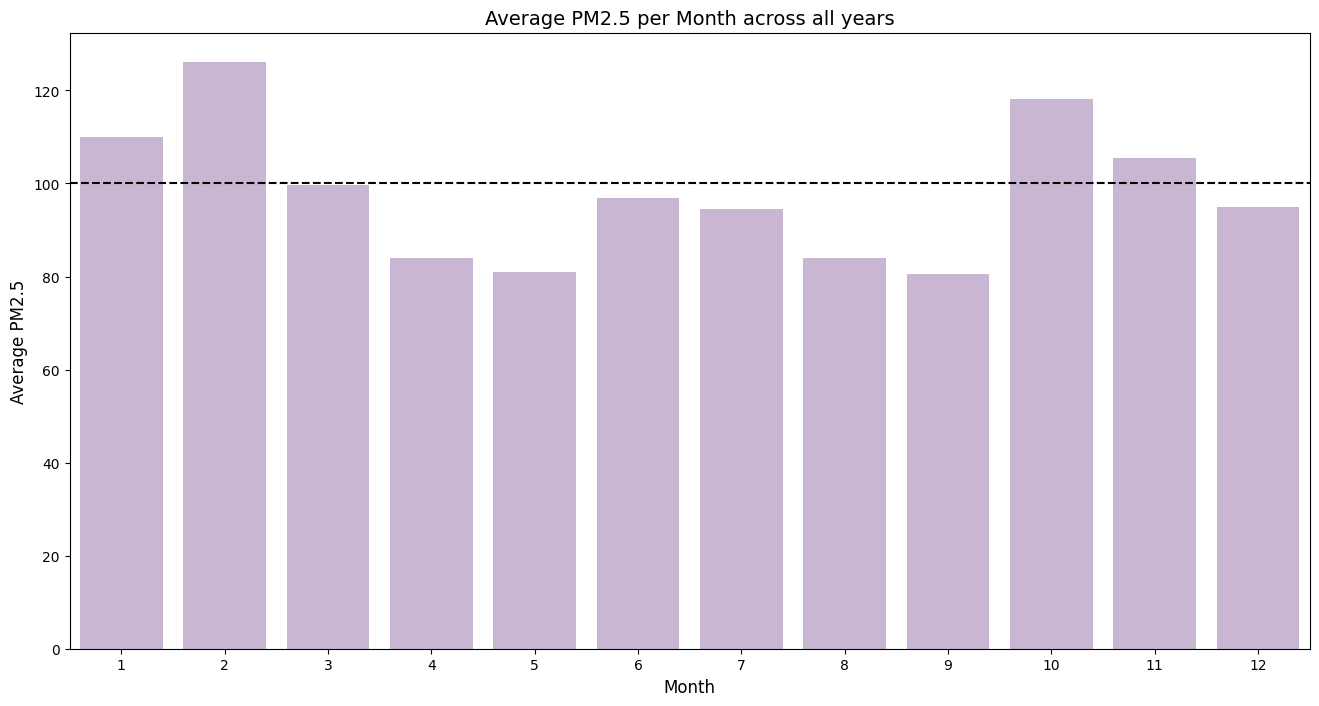

In [ ]:
# observing average pm2.5 per month
months = df.groupby('month')['pm2.5'].mean().sort_index()
base_color = sns.color_palette("Paired")[8]
plt.figure(figsize= [16, 8])
sns.barplot(x = months.index, y = months, color = base_color)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per Month across all years', fontsize = 14)
plt.axhline(100, ls= '--', color= 'black')
plt.show()

**Observation**: It is observed that the PM2.5 levels are higher at the start of the year and towards the end of the year

season
Autumn    101.582509
Spring     88.245380
Summer     91.739764
Winter    109.914911
Name: pm2.5, dtype: float64


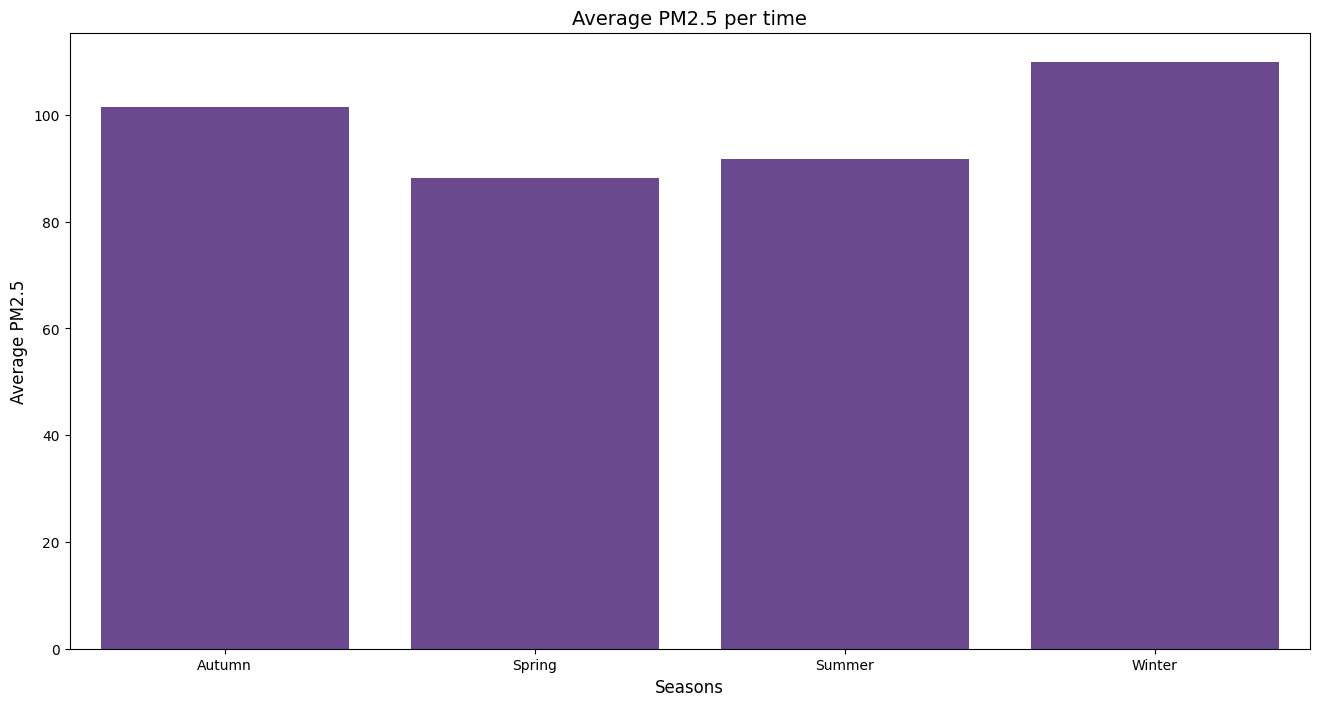

In [ ]:
# average pm2.5 per season
seasons = df.groupby('season')['pm2.5'].mean().sort_index()
print(seasons)

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette("Paired")[9]
plt.figure(figsize= [16, 8])
sns.barplot(x = seasons.index, y = seasons, color = base_color)
plt.xlabel('Seasons', fontsize = 12)
plt.ylabel('Average PM2.5', fontsize = 12)
plt.title('Average PM2.5 per time', fontsize = 14)
plt.show()

**Observation:** Autumn and Winter had the highest average pm2.5 levels.

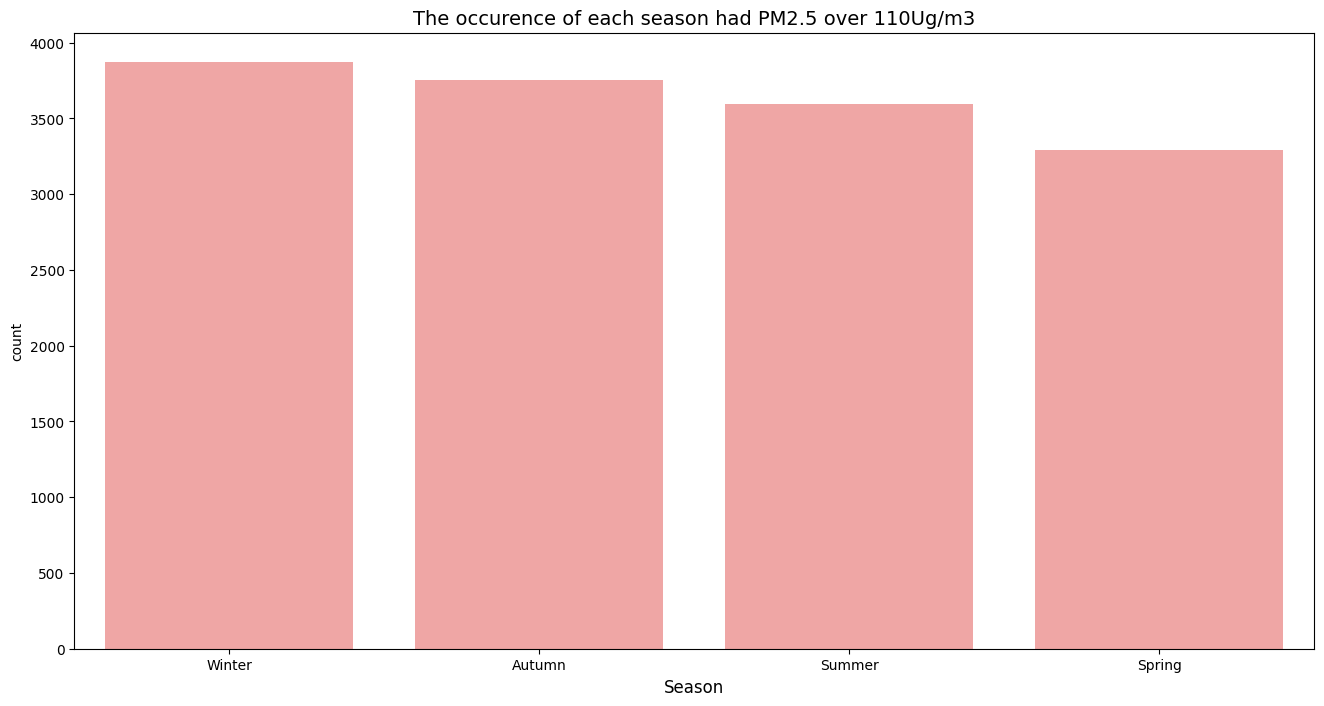

In [ ]:
# occurence of pm2.5 levels over 110 ug/m3 per season
over_pm = df[df['pm2.5'] > 110]

high = over_pm['season'].value_counts()
base_color = sns.color_palette("Paired")[4]
plt.figure(figsize= [16, 8])
sns.barplot(x = high.index, y = high, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.title('The occurence of each season had PM2.5 over 110Ug/m3', fontsize = 14)
plt.show()

**Observation**: Winter had the highest occurences when pm2.5 levels were above 110 ug/m3. Autumn was a close second. These seasons are the months from Sep to Feb.

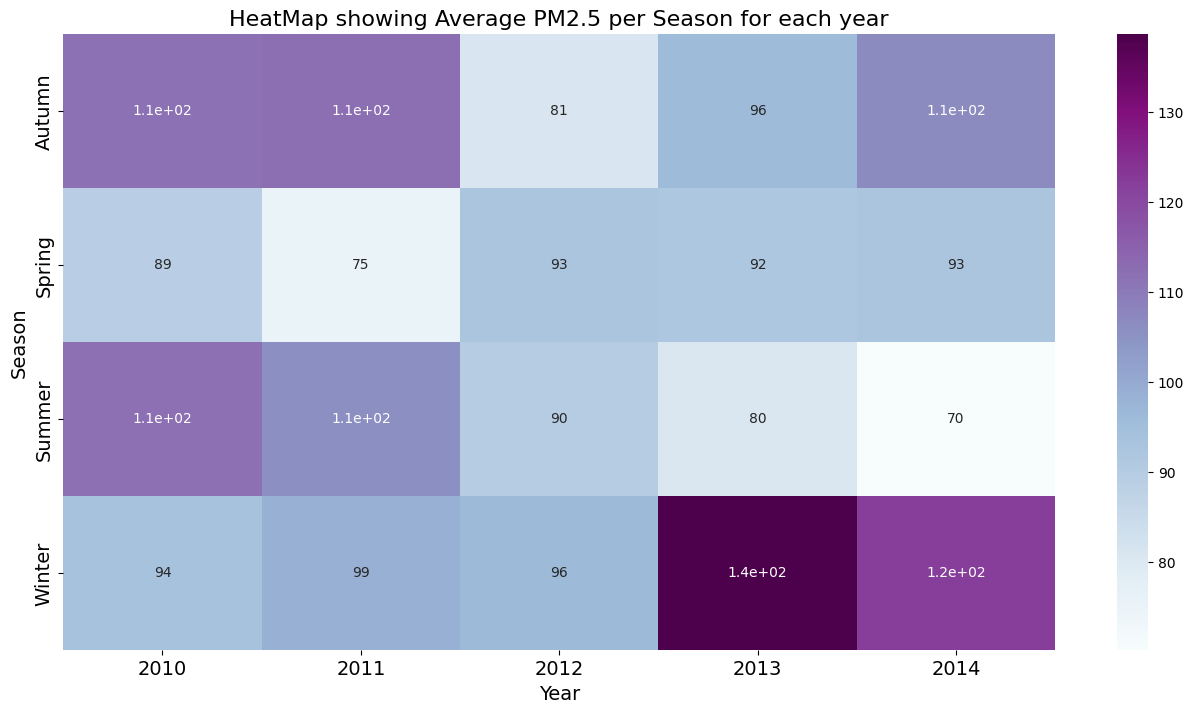

In [ ]:
# observing average pm2.5 levels per season for each year
# for clarity purpose, a heatmap is plotted to show the counts
plt.figure(figsize= (16,8))
df_mean = df.groupby(['year','season'])['pm2.5'].mean()
df_mean = df_mean.reset_index(name= 'mean')
df_mean = df_mean.pivot(columns = 'year', index = 'season', values= 'mean')
sns.heatmap(df_mean, annot= True, cmap= 'BuPu')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Season', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.title("HeatMap showing Average PM2.5 per Season for each year", fontsize= 16);

**Observations**: The winter season has an overall increase in PM2.5 levels and it gets worse as the years progress. The Level of PM2.5 during the summer was high in 2010 and 2011 but a decrease in the PM2.5 level was noticed till 2014. The PM2.5 level within the Spring season has been generally good and manageable but still poor. The PM2.5 Level in the Autumn season is not acceptable as it surpassess the 100ug/m3 threshold.

# Q-2: Does the wind speed affect air quality?
Observing the pm2.5 levels over wind speed.

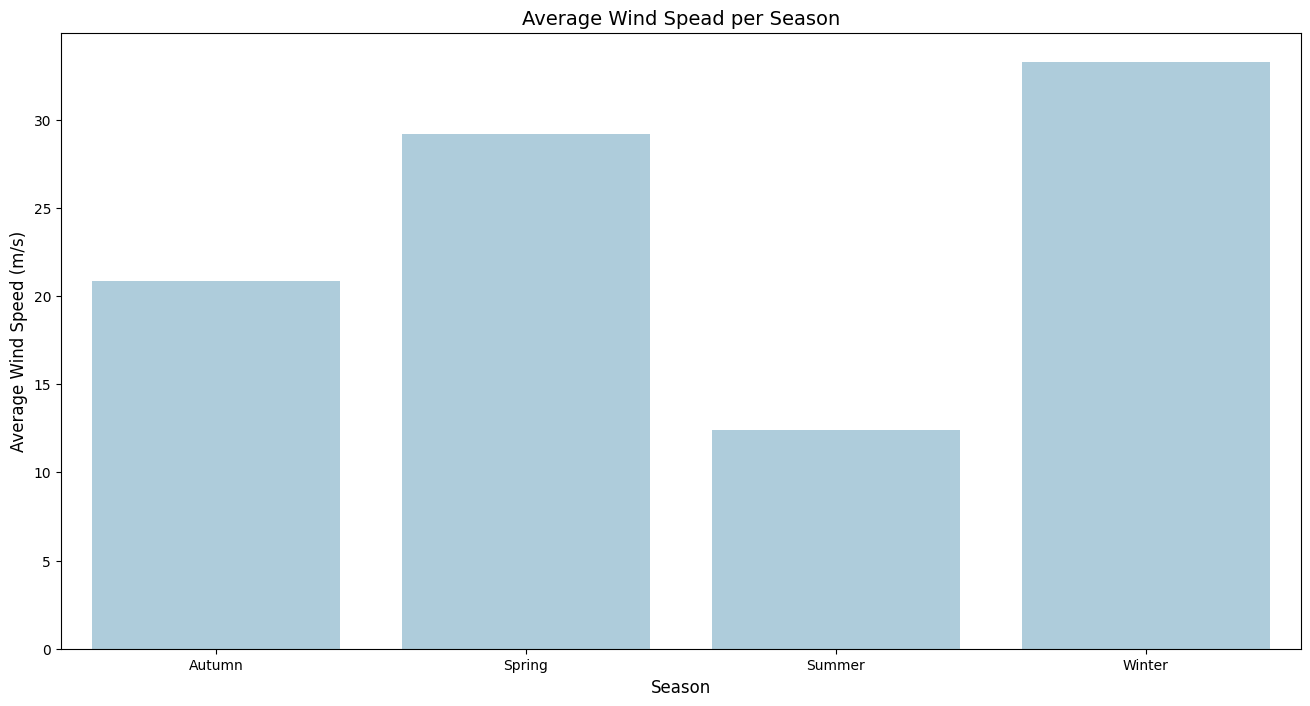

In [ ]:
# season-wise average wind speed
wind = df.groupby('season')['Iws'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
base_color = sns.color_palette("Paired")[0]
plt.figure(figsize= [16, 8])
sns.barplot(x = wind.index, y = wind, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Wind Speed (m/s)', fontsize = 12)
plt.title('Average Wind Spead per Season', fontsize = 14)
plt.show()

**Observation**:
The wind speed is highest in the winter season and lowest in summer.*italicized text*

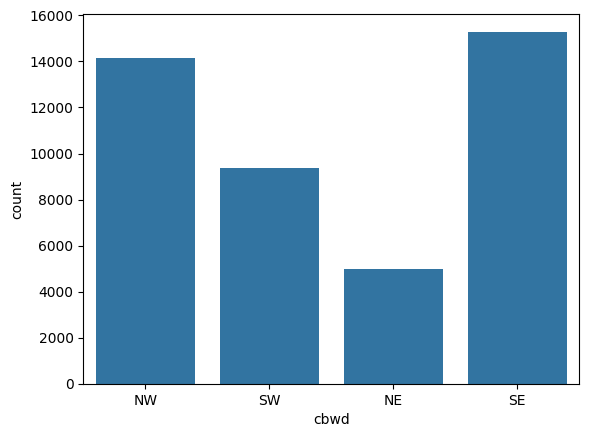

In [ ]:
# observing the wind direction.
base_color = sns.color_palette("Paired")[1]

# the plot
sns.countplot(data=df, x='cbwd', color = base_color)
plt.xticks(rotation=0);

**Observation**: The wind blows mostly in the NW and SE directions.

In [ ]:
# Displaying the windspeed in each direction using rose plot.
# first to convert the wind direction to direction in degrees
def find_angle(angle):
    season_month = {
        'NE': 45, 'SE': 135, 'SW': 225, 'NW': 315}
    return season_month.get(month)

season_list = []
for month in df['cbwd']:
    season = find_angle(month)
    season_list.append(season)

df['direction'] = season_list

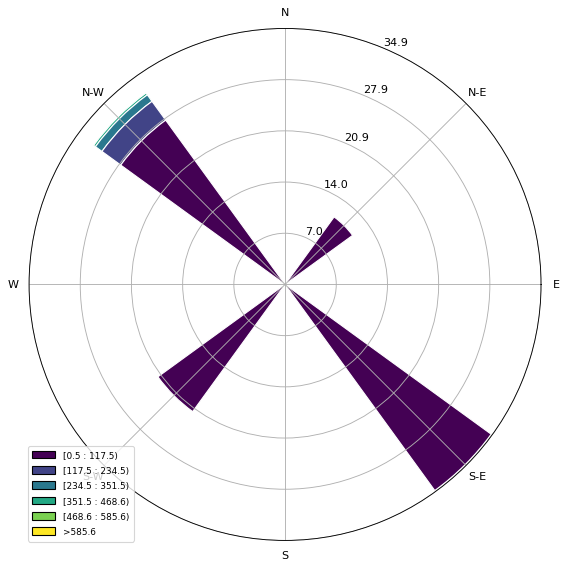

In [ ]:
ax = WindroseAxes.from_ax()
ax.bar(df.direction, df.Iws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

**Observation**: From the plot, we can see that the wind mostly goes in the South East direction but the higher wind speed goes in the North West direction.

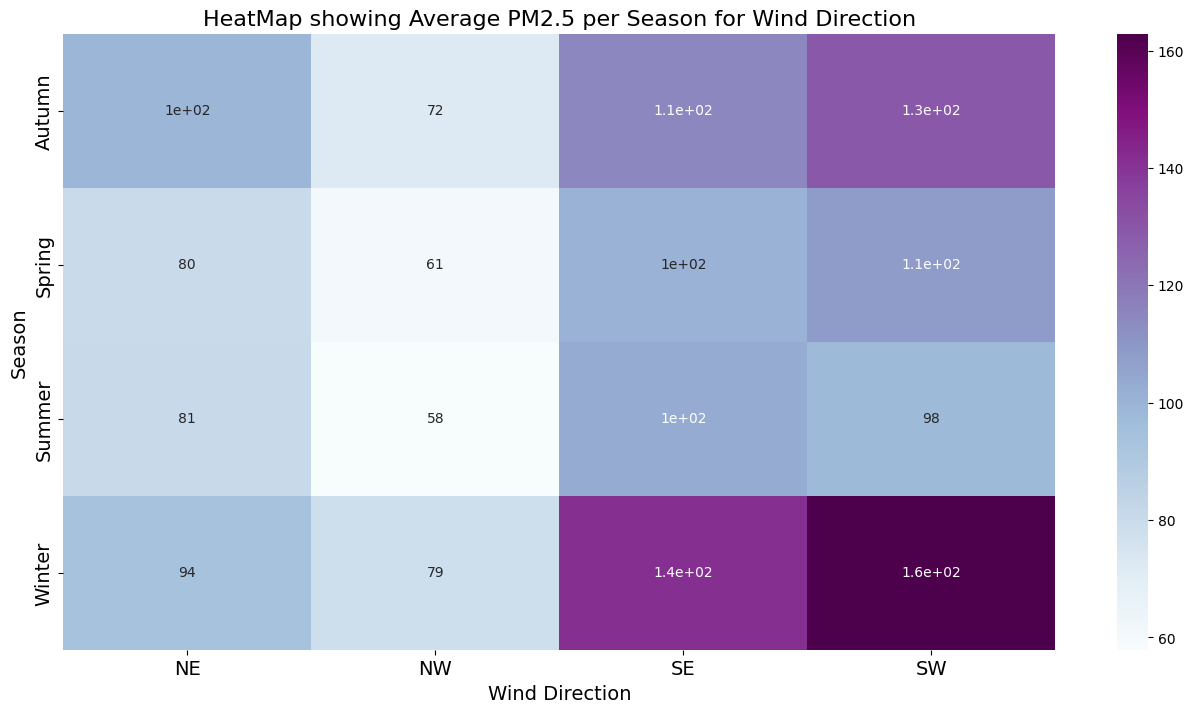

In [ ]:
# average pm2.5 for each wind direction in each season
# for clarity purpose, a heatmap is plotted to show the counts
plt.figure(figsize= (16,8))
weather_mean = df.groupby(['cbwd','season'])['pm2.5'].mean()
weather_mean = weather_mean.reset_index(name= 'mean')
weather_mean = weather_mean.pivot(columns = 'cbwd', index = 'season', values= 'mean')
sns.heatmap(weather_mean, annot= True, cmap= 'BuPu')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('Season', fontsize = 14)
plt.xlabel('Wind Direction', fontsize = 14)
plt.title("HeatMap showing Average PM2.5 per Season for Wind Direction", fontsize= 16);

**Observation**: The Average PM2.5 levels are higher during the winter season and when the Wind Direction is South West. Higher levels of PM2.5 occur in the South East and South West.

In [ ]:
# Correlation between wind speed and PM2.5
weather_autumn = df[df['season'] == 'Autumn']
corr = weather_autumn['pm2.5'].corr(weather_autumn['Iws'])
print("Correlation between PM2.5 and Wind Speed during Autumn is: ", round(corr, 2))

weather_spring = df[df['season'] == 'Spring']
corr = weather_spring['pm2.5'].corr(weather_spring['Iws'])
print("Correlation between PM2.5 and Wind Speed during Spring is: ", round(corr, 2))

weather_summer = df[df['season'] == 'Summer']
corr = weather_summer['pm2.5'].corr(weather_summer['Iws'])
print("Correlation between PM2.5 and Wind Speed during Summer is: ", round(corr, 2))

weather_winter = df[df['season'] == 'Winter']
corr = weather_winter['pm2.5'].corr(weather_winter['Iws'])
print("Correlation between PM2.5 and Wind Speed during Winter is: ", round(corr, 2))

Correlation between PM2.5 and Wind Speed during Autumn is:  -0.24
Correlation between PM2.5 and Wind Speed during Spring is:  -0.27
Correlation between PM2.5 and Wind Speed during Summer is:  -0.01
Correlation between PM2.5 and Wind Speed during Winter is:  -0.3


**Observation**: The relationship between the PM2.5 and Wind Speed is really low across all seasons.

## Q-3: How temperature and pressure affect the air quality?

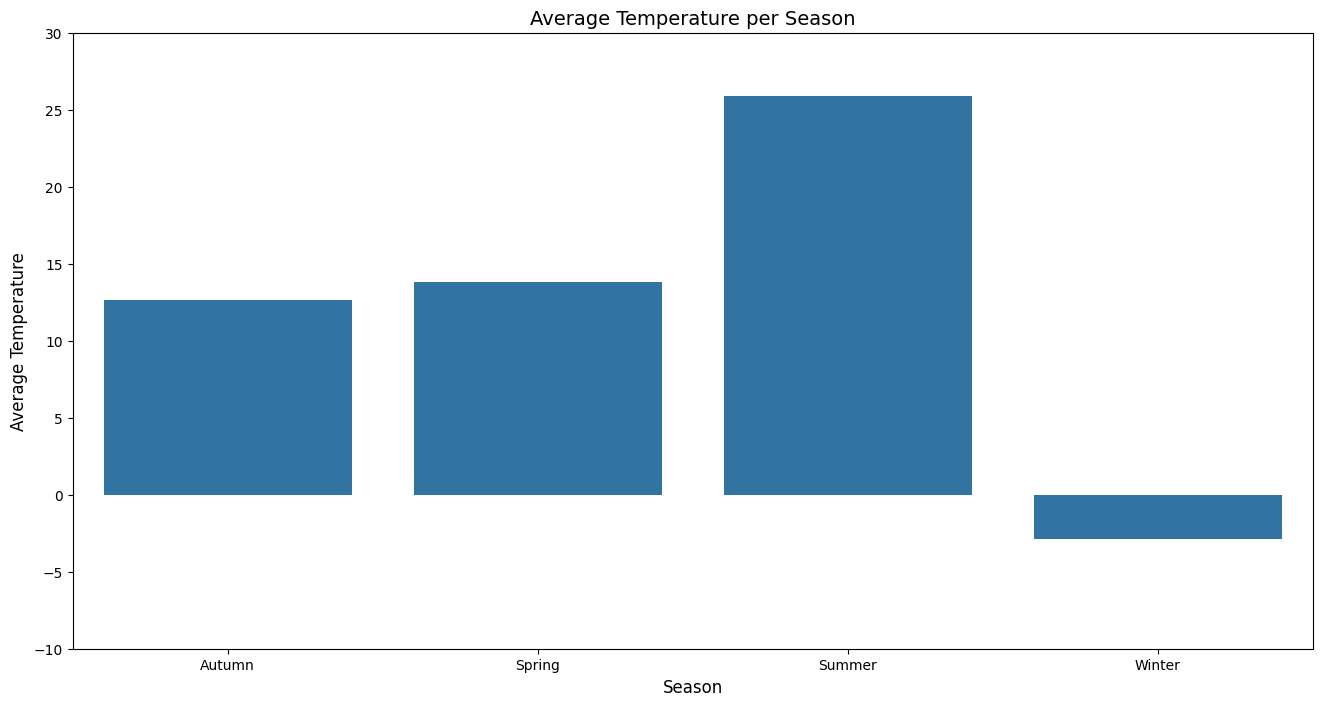

In [ ]:
# average temperature per season
temp = df.groupby('season')['TEMP'].mean().sort_index()
month = ['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
x = [-10, -5, 0, 5, 10, 15, 20, 25, 30]
base_color = sns.color_palette("Paired")[1]
plt.figure(figsize= [16, 8])
sns.barplot(x = temp.index, y = temp, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Temperature', fontsize = 12)
plt.yticks(x)
plt.title('Average Temperature per Season', fontsize = 14)
plt.show()

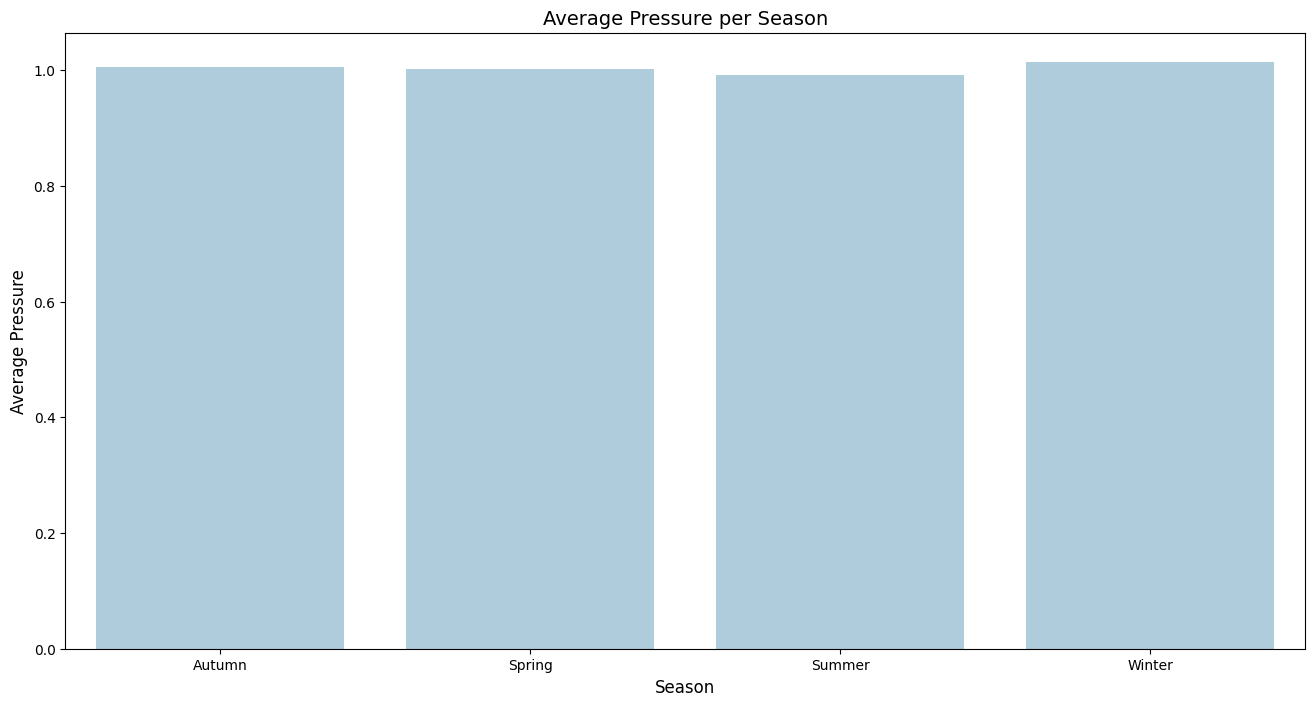

In [ ]:
# average pressure per season
pressure = df.groupby('season')['atm_pressure'].mean().sort_index()
base_color = sns.color_palette("Paired")[0]
plt.figure(figsize= [16, 8])
sns.barplot(x = pressure.index, y = pressure, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Pressure', fontsize = 12)
plt.title('Average Pressure per Season', fontsize = 14)
plt.show()

**Observation**: The charts above show that the average temperature is lowest during the winter period and highest during the summer period. The average pressure is consistent around 1 atm across all seasons.

Correlation between PM2.5 and Atmosperic Temperature is:  -0.08


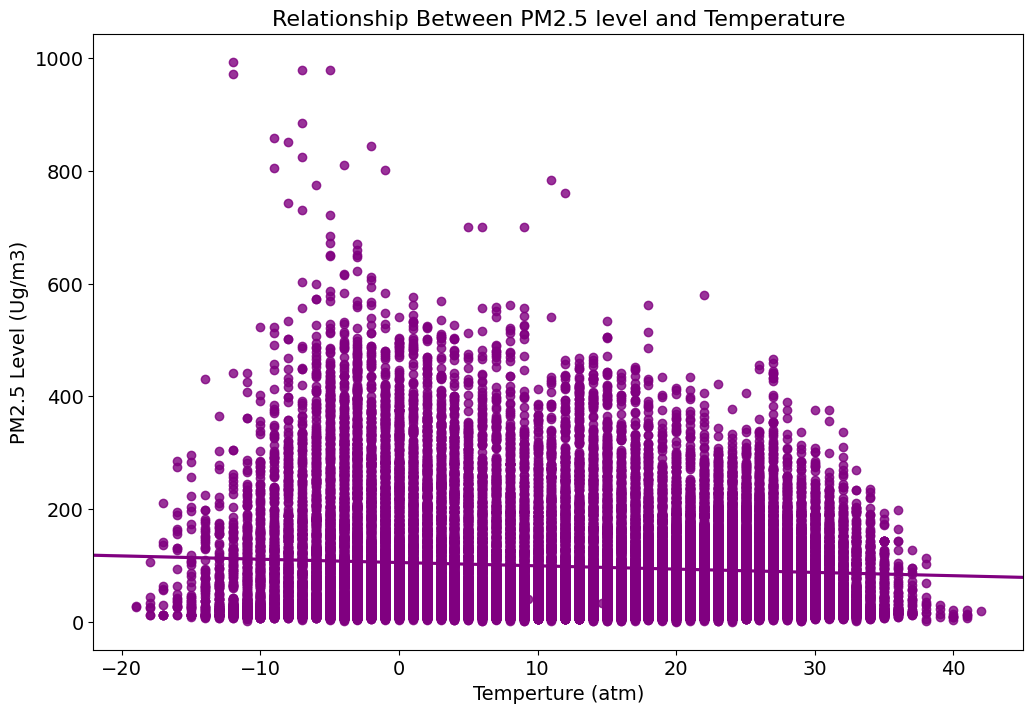

In [ ]:
# relation between pm2.5 and temperature
corr = df['pm2.5'].corr(df['TEMP'])
print("Correlation between PM2.5 and Atmosperic Temperature is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'TEMP', y = 'pm2.5', data = df, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Temperture (atm)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Temperature", fontsize= 16)
plt.show();


**Observation**: The relatioship between temperature and the PM2.5 level is close to zero which means there is no correlation. No clear patter observed in the scatter diagram.



## Q-4: How does the Precipitation affect PM2.5 levels.


season
Autumn    0.288004
Spring    0.153895
Summer    0.332337
Winter    0.002679
Name: Ir, dtype: float64


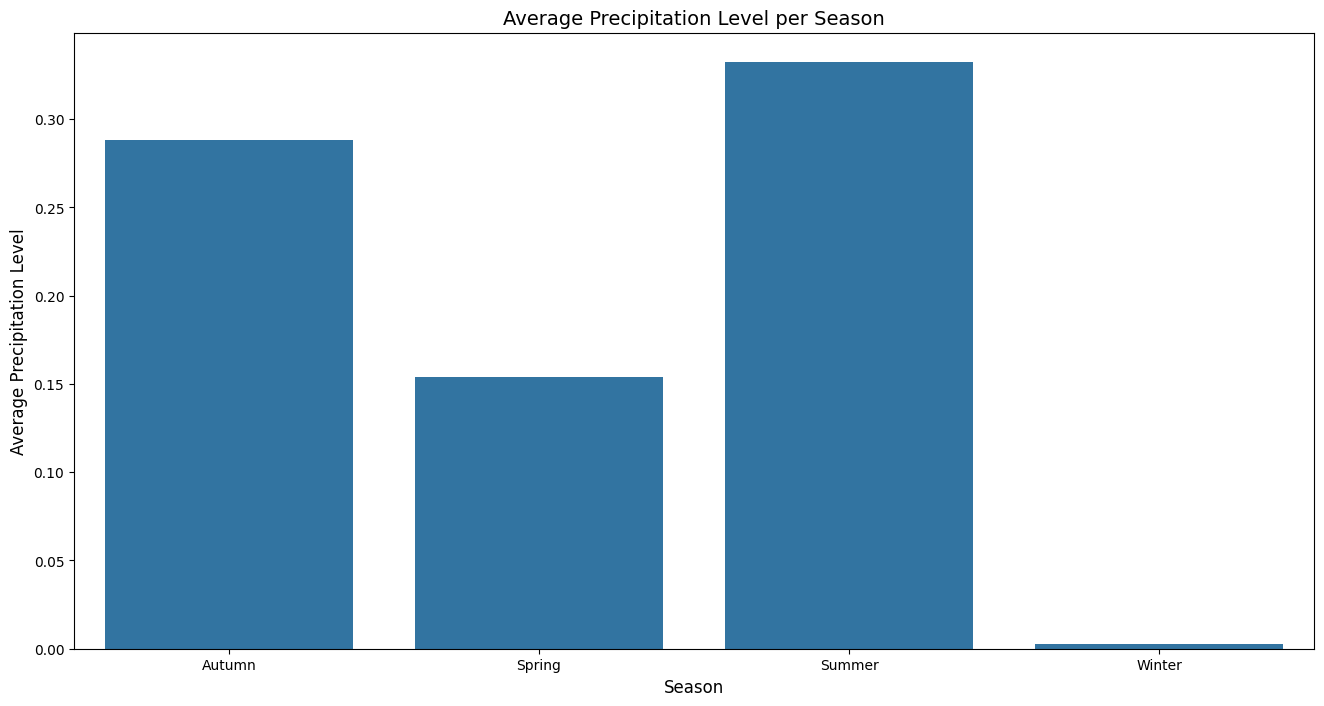

In [ ]:
# average hours of rain level in each season
rain = df.groupby('season')['Ir'].mean().sort_index()
print(rain)

base_color = sns.color_palette("Paired")[1]
plt.figure(figsize= [16, 8])
sns.barplot(x = rain.index, y = rain, color = base_color)
plt.xlabel('Season', fontsize = 12)
plt.ylabel('Average Precipitation Level', fontsize = 12)
plt.title('Average Precipitation Level per Season', fontsize = 14)
plt.show()

**Observation**: The amount of hours of rainfall (Precipitation Level) is observed highest in the Summer and the Autumn season. It is negligible in the Winter season.

Correlation between PM2.5 and Precipitation Level is:  -0.05


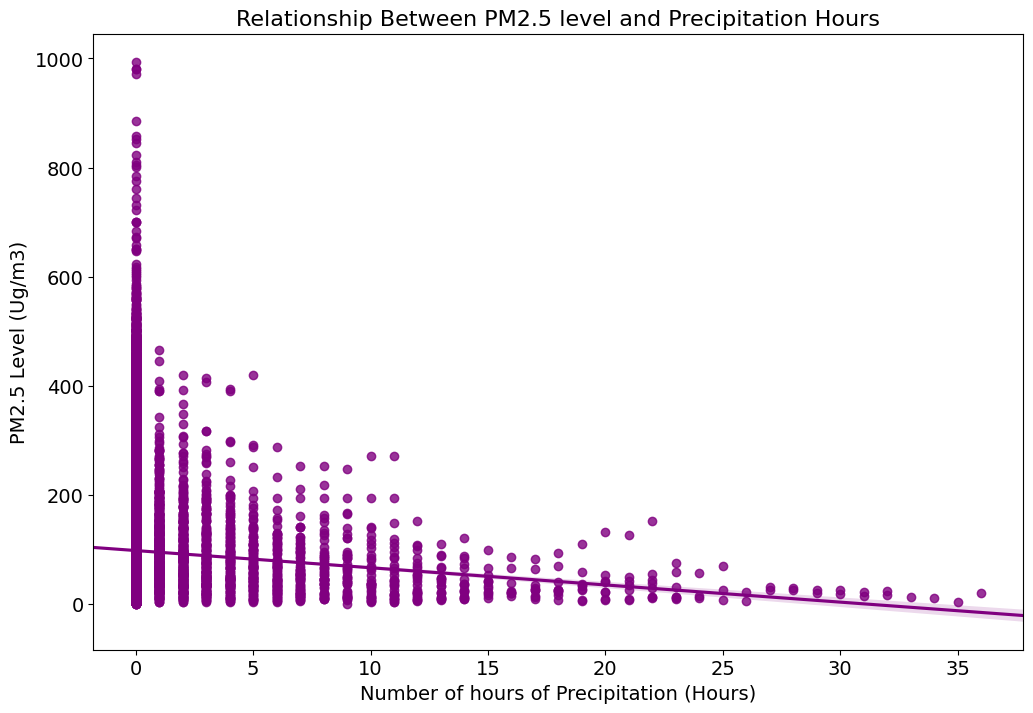

In [ ]:
# no. of hours of precipitation vs pm2.5 levels
# to print out the correlation between wind speed and PM2.5
corr = df['pm2.5'].corr(df['Ir'])
print("Correlation between PM2.5 and Precipitation Level is: ", round(corr, 2))


# to plot a scatter plot income and amount requested
plt.figure(figsize= (12,8))
sns.regplot(x = 'Ir', y = 'pm2.5', data = df, color = 'purple', truncate= False)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.ylabel('PM2.5 Level (Ug/m3)', fontsize = 14)
plt.xlabel("Number of hours of Precipitation (Hours)", fontsize = 14)
plt.title("Relationship Between PM2.5 level and Precipitation Hours", fontsize= 16)
plt.show();

**Observation**: The correlation between number of hours of precipitation and PM2.5 is almost 0, this means that there is no linear relationship between the two variables. On looking for patterns, it is observed that for low amount of precipitation hours (below 15 hours), there are observed to be high PM2.5 level. It is safe to say that the lower the hours of rainfall, the higher the PM2.5 level

# Conclusion
After analysing the dataset, I concluded the following:
1. The mean PM2.5 level was 97.80 ug/m3. For each year, the PM2.5 average was also around the same. This shows that the city's air quality is poor.

2. The PM2.5 levels were highest during the winter season i.e., from December to February. The levels for the Autumn season also surpassed the safe zone threshold.

3. Lower wind speeds corresponded to higher PM2.5 levels.

4. Higher levels of PM2.5 occurs more often when the wind direction is going towards the South West (SW) then the South East. It gets extremely high during the winter period when the wind direction is headed towards the South East and South West.

5. No relationship observed between temperature and PM2.5 levels.

6. There was steady pressure level of ~1 atm.

7. Low hours of precipitation (rainfall) correlated to higher levels of PM2.5. Low PM2.5 levels observed when precipitation was for longer hours.